a) Importance of nouns for GELECTRA 

b) Importance of Question-Words

c) Difference between start and end tokens

d) No significant NER differences for different questiont types

e) Investigate Wo-Fragen, just for the sacke of wo == LOC/GEL theory


# Which NER ist most interesting for GELECTRA?

## Initialize Settings

In [1]:
%cd ..

/home/jupyter-stefan.beuchert/2022-11-26_version


In [2]:
# requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# config
number_of_features = 10 # the default value
number_of_samples = 5000 # the default value

source_path_for_data = f'data/Data_Preparation/lime_ns_{number_of_samples}_nf_{number_of_features}_after_frequency_analysis.json'

# list of possible POS tags
NER_tag_list = ['',
               'LOC',
               'PER',
               'MISC',
               'ORG']

In [30]:
# load data
data_df = pd.read_json(source_path_for_data)
data_df['explanation'] = [pd.DataFrame(exp) for exp in data_df['explanation'].tolist()]
data_df.head(1)

,question,answers,context,document_id,is_impossible,usage,prediction,explanation
37495,Wie viele Amerikaner fühlen sich mehr als eine...,"[{'answer_id': 37854, 'document_id': 41057, 'q...",Race__United_States_Census_\n\n=== „Race“ ===\...,41057,False,test,fast sieben Millionen,position_id lime_token question_or_cont...


## Importance of enteties for GELECTRA

In [10]:
import spacy
import de_core_news_md
nlp = de_core_news_md.load()
nlp = spacy.load("de_core_news_md")
nlp.get_pipe('ner').labels

# es gibt nur 4 labels

ModuleNotFoundError: No module named 'de_core_news_md'

In [12]:
!python -m spacy download de_core_news_sm

/home/jupyter-stefan.beuchert/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/jupyter-stefan.beuchert/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:529: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() if nvml_count < 0 else nvml_count
Traceback (most recent call last):
  File "/opt/tljh/user/lib/python3.9/site-packages/urllib3/connection.py", line 174, in _new_conn
    conn = connection.create_connection(
  File "/opt/tljh/user/lib/python3.9/site-packages/urllib3/util/connection.py", line 73, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREA

In [31]:
# get NOUN and PROPN counts in LIME highlights

# get total number of LIME Highlights
# get NOUN and PROPN counts for all possible tokens

In [32]:
# get NOUN and PROPN counts in LIME highlights

# get list of all explanations (containing every data point with info about each token)
explanation_list = data_df.explanation.tolist()

# create empty dicts to count POS tags 
general_counter_for_NER = {NER_tag: 0 for NER_tag in NER_tag_list}
lime_highlights_for_start_tokens__counter_for_NER = {NER_tag: 0 for NER_tag in NER_tag_list}
lime_highlights_for_end_tokens__counter_for_NER = {NER_tag: 0 for NER_tag in NER_tag_list}


# for each token in each data point
for explanation in explanation_list:
        
        # get lime highlights for start and end token subsets
        lime_highlights_for_start_token = explanation[explanation['start_token_weight'].notnull()]
        lime_highlights_for_end_token = explanation[explanation['end_token_weight'].notnull()]
        
        # get total count of each POS tag for that data point
        total_count_of_each_NER = explanation['ner_tag'].value_counts()
        total_count_of_each_NER_for_start_token_highlights = lime_highlights_for_start_token['ner_tag'].value_counts()
        total_count_of_each_NER_for_end_token_highlights = lime_highlights_for_end_token['ner_tag'].value_counts()
        
        # convert panda.Series to dicts for better extraction of values
        total_count_of_each_NER_dict = total_count_of_each_NER.to_dict()
        total_count_of_each_NER_for_start_token_highlights_dict = total_count_of_each_NER_for_start_token_highlights.to_dict()
        total_count_of_each_NER_for_end_token_highlights_dict = total_count_of_each_NER_for_end_token_highlights.to_dict()
        
        
        # save POS counts in designated dicts
        for ner_tag in total_count_of_each_NER_dict:
            general_counter_for_NER[ner_tag] += total_count_of_each_NER_dict[ner_tag]
            
        for ner_tag in total_count_of_each_NER_for_start_token_highlights_dict:
            lime_highlights_for_start_tokens__counter_for_NER[ner_tag] += total_count_of_each_NER_for_start_token_highlights_dict[ner_tag]
        
        for ner_tag in total_count_of_each_NER_for_end_token_highlights_dict:
            lime_highlights_for_end_tokens__counter_for_NER[ner_tag] += total_count_of_each_NER_for_end_token_highlights_dict[ner_tag]
            
# remove 'SPACE' and '' elements from the dict, as they do not represent valid tokens
if False:
    general_counter_for_NER.pop('SPACE')
    general_counter_for_NER.pop('')
    general_counter_for_NER.pop('SYM')
    general_counter_for_NER.pop('INTJ')

    lime_highlights_for_start_tokens__counter_for_NER.pop('SPACE')
    lime_highlights_for_start_tokens__counter_for_NER.pop('')
    lime_highlights_for_start_tokens__counter_for_NER.pop('SYM')
    lime_highlights_for_start_tokens__counter_for_NER.pop('INTJ')

    lime_highlights_for_end_tokens__counter_for_NER.pop('SPACE')
    lime_highlights_for_end_tokens__counter_for_NER.pop('')
    lime_highlights_for_end_tokens__counter_for_NER.pop('SYM')
    lime_highlights_for_end_tokens__counter_for_NER.pop('INTJ')

# safe data in df
frequencies_df = pd.DataFrame([general_counter_for_NER, 
                               lime_highlights_for_start_tokens__counter_for_NER, 
                               lime_highlights_for_end_tokens__counter_for_NER])

frequencies_df = frequencies_df.T
frequencies_df = frequencies_df.rename({0: 'general total', 1: 'start token total', 2: 'end token total'}, axis='columns')
frequencies_df

,general total,start token total,end token total
,670775,17981,17928
LOC,36833,1250,1281
PER,28768,863,915
MISC,40793,1073,998
ORG,20388,593,638


# TODO: HIER DIE BERECHNUNGEN NOCH MAL ÜBERDENKEN

In [33]:
frequencies_df['general percentage'] = frequencies_df['general total'] / frequencies_df['general total'].sum()
frequencies_df['start token percentage'] = frequencies_df['start token total'] / frequencies_df['start token total'].sum() 
frequencies_df['end token percentage'] = frequencies_df['end token total'] / frequencies_df['end token total'].sum() 

frequencies_df['start token deviation from general'] = (frequencies_df['start token percentage'] - frequencies_df['general percentage']) / frequencies_df['general percentage']
frequencies_df['end token deviation from general'] = (frequencies_df['end token percentage'] - frequencies_df['general percentage']) / frequencies_df['general percentage']

frequencies_df['start token total deviation'] = frequencies_df['start token total'] - (frequencies_df['general percentage'] * frequencies_df['start token total'].sum())
frequencies_df['end token total deviation'] =  frequencies_df['end token total'] - (frequencies_df['general percentage'] * frequencies_df['end token total'].sum())

frequencies_df

,general total,start token total,end token total,general percentage,start token percentage,end token percentage,start token deviation from general,end token deviation from general,start token total deviation,end token total deviation
,670775,17981,17928,0.841037,0.826333,0.823897,-0.017484,-0.020380,-319.966577,-372.966577
LOC,36833,1250,1281,0.046182,0.057445,0.058869,0.243872,0.274720,245.073606,276.073606
PER,28768,863,915,0.036070,0.039660,0.042050,0.099522,0.165774,78.113553,130.113553
MISC,40793,1073,998,0.051147,0.049311,0.045864,-0.035911,-0.103299,-39.968327,-114.968327
ORG,20388,593,638,0.025563,0.027252,0.029320,0.066063,0.146962,36.747745,81.747745


In [34]:
print(frequencies_df['general total'].sum())
print(frequencies_df['start token total'].sum())
print(frequencies_df['end token total'].sum())

797557
21760
21760


<AxesSubplot: title={'center': 'percentage difference start token'}>

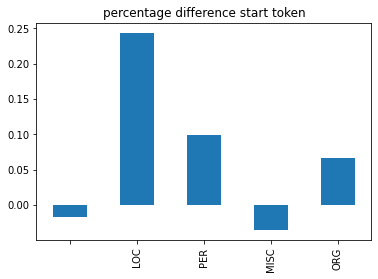

In [35]:
frequencies_df['start token deviation from general'].plot(kind="bar", title = 'percentage difference start token')

<AxesSubplot: title={'center': 'total difference start token'}>

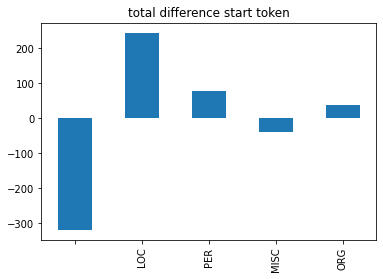

In [36]:
frequencies_df['start token total deviation'].plot(kind="bar", title = 'total difference start token')

<AxesSubplot: title={'center': 'percentage difference end token'}>

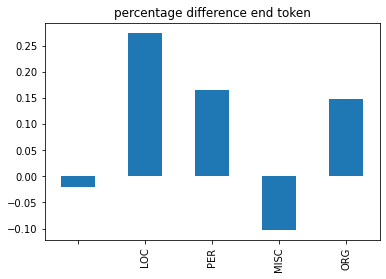

In [37]:
frequencies_df['end token deviation from general'].plot(kind="bar", title = 'percentage difference end token')

<AxesSubplot: title={'center': 'total difference end token'}>

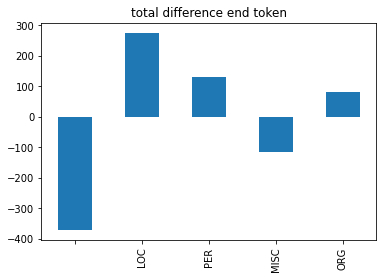

In [38]:
frequencies_df['end token total deviation'].plot(kind="bar", title = 'total difference end token')

## NER on question level

NameError: name 'nlp' is not defined